# Elliptic woth Neumann boundary conditions

We aim to solve an elliptic linear PDE of the form 

$$
Lu = \xi \\
\nabla u \cdot  \bold{n}= \frac{\partial}{\partial \bold{n}}u=0
$$

We need to form the matrix 

$$
\Theta = \begin{bmatrix}
  \frac{\partial}{\partial \bold{n}_x} \frac{\partial}{\partial \bold{n}_y} K(X_{\partial\Omega},X_{\partial\Omega}) & \int L_y  \frac{\partial}{\partial \bold{n}_x} K(X_{\partial\Omega}, y)\psi \\
\int L_y \frac{\partial}{\partial \bold{n}_x}  K(X_{\partial\Omega}, y)\psi ^\intercal & \int \int  L_y L_x K( x, y) \psi(x)\psi(y)
\end{bmatrix}
$$

In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

from utils_elliptic_coef_neumann import *

import jax.numpy as jnp
from jax import jit, vmap

import matplotlib.pyplot as plt 

from jax import grad
from jax import scipy



from jax import random

/tmp/ipykernel_3228006/3853667653.py:1: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [2]:
import importlib
import utils_elliptic_coef_neumann  # replace with your module name

# Make some changes to some_module here

# Force reload the module
importlib.reload(utils_elliptic_coef_neumann)
from utils_elliptic_coef_neumann import *

In [3]:
# Force reload the module
importlib.reload(utils_elliptic_coef_neumann)
from utils_elliptic_coef_neumann import *

# Generating an example


Let us solve 
\begin{aligned}
 -\varepsilon \Delta u + b(x)u &= f \quad x \in \Omega\\
\frac{\partial}{\partial \nu}u &= 0 \quad x \in \partial \Omega
\end{aligned}

If 
$$
u =  \sqrt{\frac{2}{L}}\sum_{i}^\infty c_i \cos\Big(\frac{n\pi x}{L}\Big)
$$

Then 
$$
f =  \sqrt{\frac{2}{L}} \sum_{i}^\infty  \Big(\varepsilon\frac{n^2\pi^2}{L^2} - b(x)\Big)c_i \cos\Big(\frac{n\pi x}{L}\Big)
$$

In [4]:
def evaluate_function(x, coef, L):
    values = 0
    for i, c in enumerate(coef):
        values +=c*jnp.cos((i+1)*jnp.pi*x/L)*jnp.sqrt(2/L)
    return values

In [5]:
# Define the domain of the problem
lower = 0.0
upper = 1.0
L = upper - lower
x = jnp.linspace(lower, upper, 1000)
boundary = jnp.array([[lower, upper]]).T
boundary_conditions = jnp.zeros(shape = (2, )) # Homogeneous boundary conditions
domain = jnp.array([lower, upper])

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [6]:
#plt.style.use('plot_style-Examples.txt')

plt.style.use('default')

#  4:3 aspect ratio
width = 4
height = width * 3 / 4

width = 16
height = width * 9 / 16

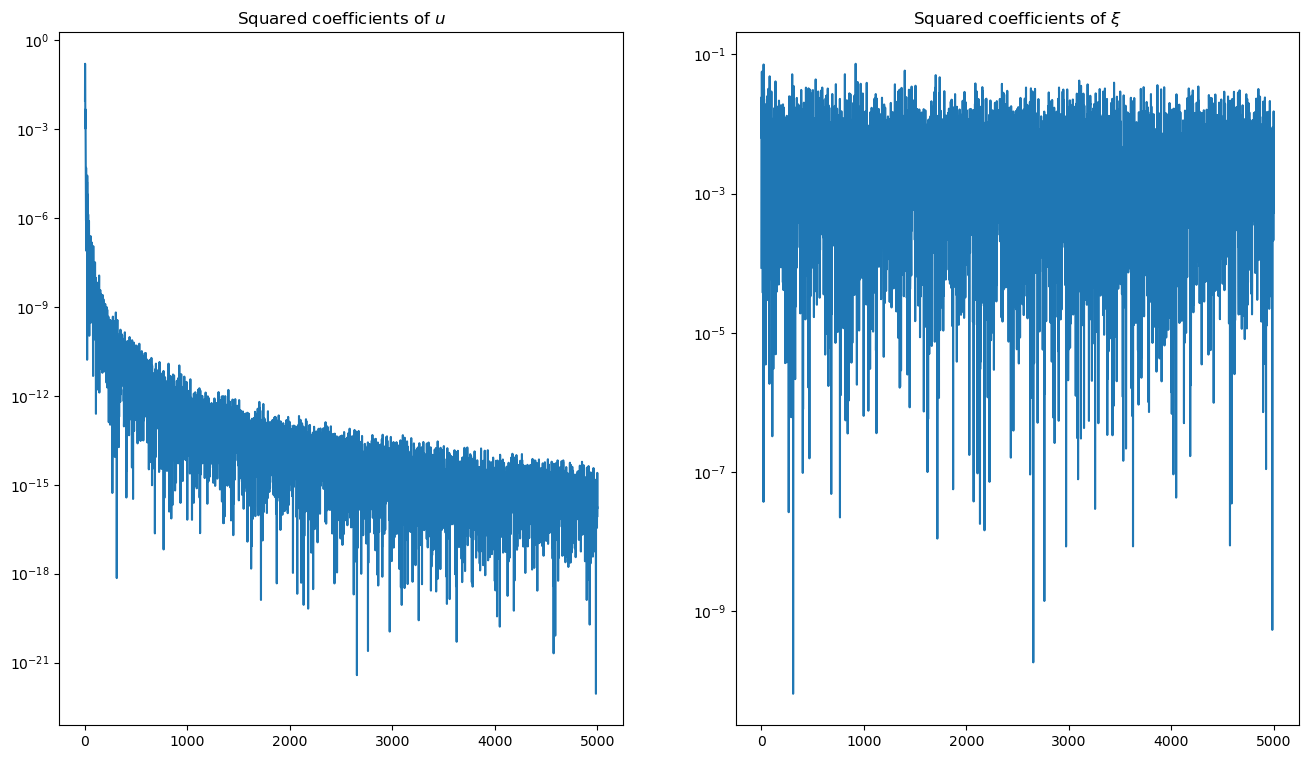

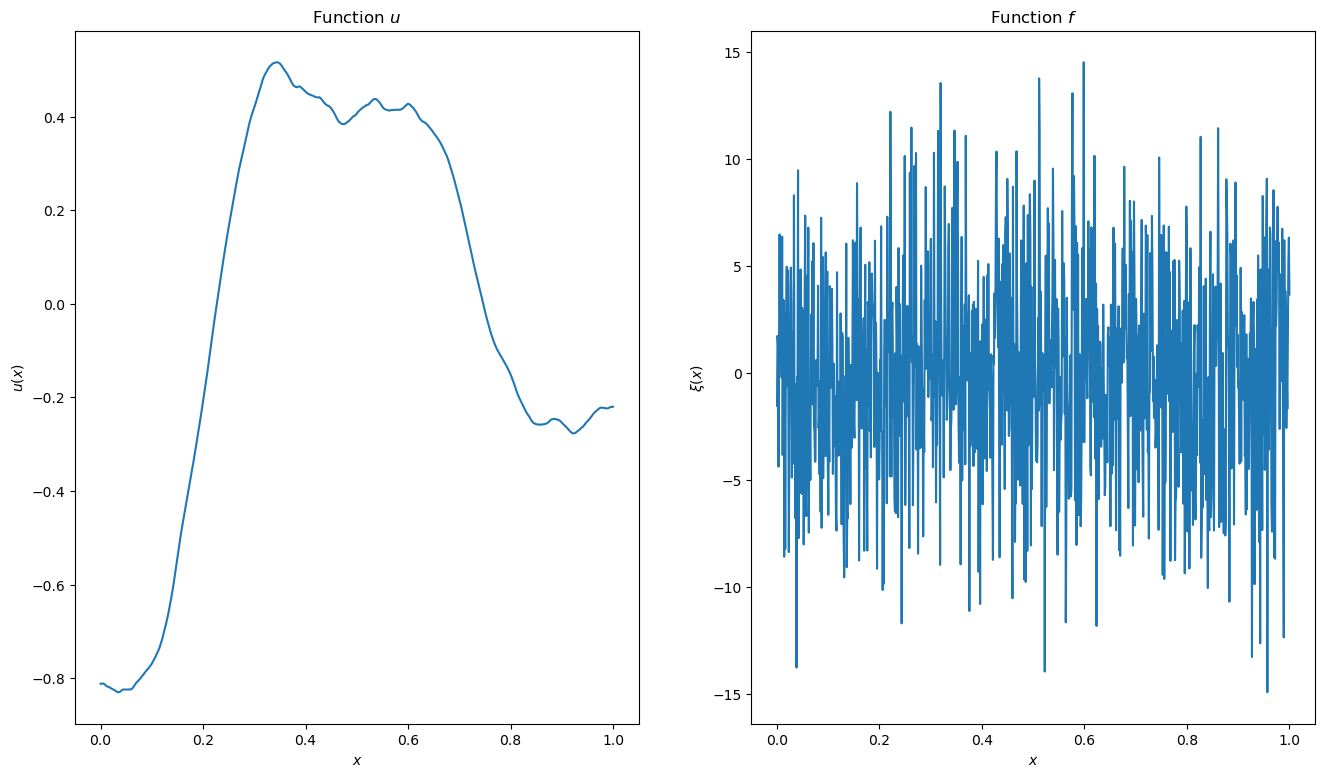

In [7]:
# Create the RHS

nu = 1e-2
b = lambda x: jnp.ones_like(x)*0.5 # coefficient in front of the u in the PDE (constant here)

# draw random values for the coefficients
#key = random.PRNGKey(54)
key = random.PRNGKey(67)
n_coef = 5000

s =  1.5# Because we are dealing with Neumann boundary conditions, we need to be in H^{1 + 1/2} at least
alpha = 2*s+1 + 0.1
decay_u = alpha/2
L = 1 # Lenght of the domain
coef_u =  jnp.ones(shape = (1, ))/(jnp.arange(1, n_coef+1)**(decay_u)) #jnp.ones(shape = (1, ))#random.normal(key, shape=(n_coef,))/(jnp.arange(1, n_coef+1)**(decay_u))

coef_u = random.normal(key, shape=(n_coef,))/(jnp.arange(1, n_coef+1)**(decay_u))
coef_f_constant = coef_u*(nu*jnp.arange(1, n_coef+1)**(2)*jnp.pi**2*L**2)

#x = jnp.linspace(0, L, 2000)
u_values = evaluate_function(x, coef_u, L=L)
f_values = evaluate_function(x, coef_f_constant, L=L) + b(x)*u_values

# Plot both the coeffients of u and f in 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(width, height))
ax1.plot(coef_u**2)
ax1.set_yscale('log')
ax1.set_title(r'Squared coefficients of $u$')
ax2.plot(coef_f_constant**2)
ax2.set_yscale('log')
ax2.set_title(r'Squared coefficients of $\xi$')

plt.show()

# Create 2 plots for the  function u and f
fig, ax = plt.subplots(1, 2, figsize=(width, height))
ax[0].plot(x, u_values)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$u(x)$")
ax[0].set_title(r"Function $u$")

ax[1].plot(x, f_values)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$\xi(x)$")
ax[1].set_title(r"Function $f$")

plt.gca().autoscale()  # This applies to the current axis

plt.show()

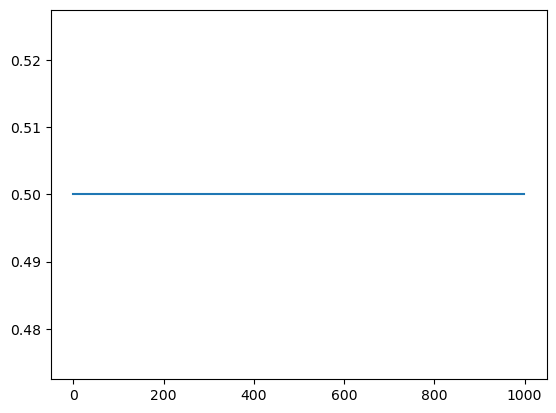

In [8]:
plt.plot(b(x))

## Create measurements of the RHS

In [9]:
# Force reload the module
import utils_rough_pde
importlib.reload(utils_rough_pde)
from utils_rough_pde import measurement_tool

In [10]:
domain = jnp.array([lower , upper])

In [11]:
m_tool = measurement_tool(domain, 2000, mode = "Dirichlet")
root_b = m_tool.evaluate_at_roots(b)

In [12]:
psi_matrix = m_tool.psi_matrix
root_psi = m_tool.root_psi
b_root = root_b
centers = m_tool.centers

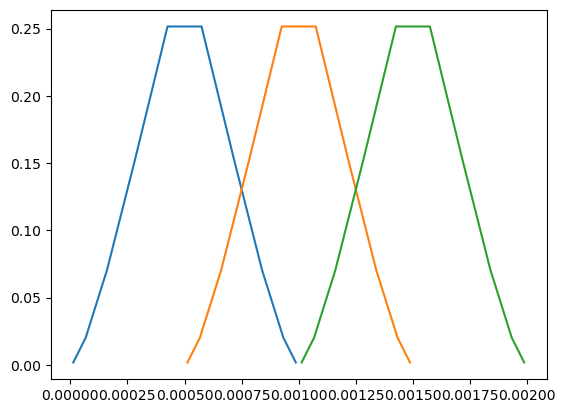

In [13]:
plt.plot(root_psi[0], psi_matrix[0])
plt.plot(root_psi[1], psi_matrix[1])
plt.plot(root_psi[2], psi_matrix[2])


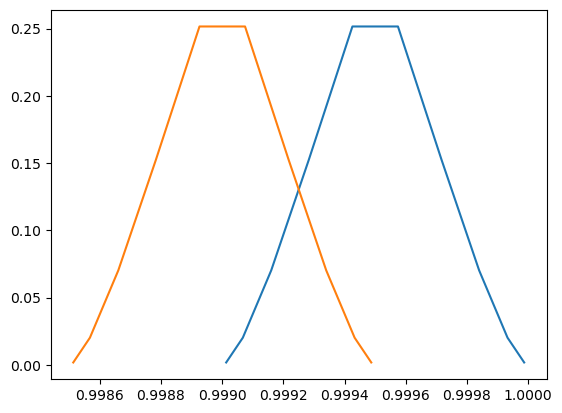

In [14]:
plt.plot(root_psi[-1], psi_matrix[-1])
plt.plot(root_psi[-2], psi_matrix[-2])

In [15]:
# Project f against the test functions
f_quad = evaluate_function(m_tool.root_psi, coef_f_constant, L) + b(m_tool.root_psi)*evaluate_function(m_tool.root_psi, coef_u, L)
f_meas = m_tool.project(f_quad)

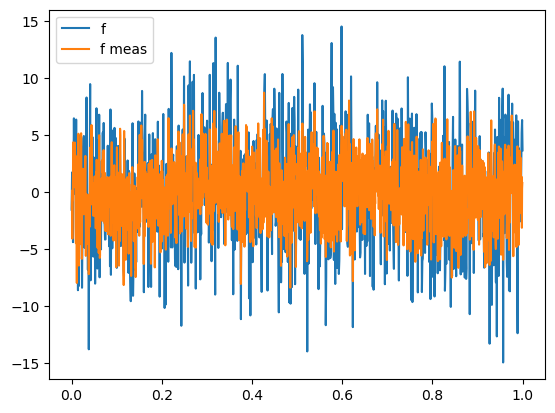

In [16]:
plt.plot(x, f_values, label = 'f')
plt.plot(m_tool.centers, f_meas,  label = 'f meas')

plt.legend()

## Solving  elliptic equations

Let us solve 
\begin{aligned}
 -\nu \Delta u +b(x)u &= f \quad x \in \Omega\\
\frac{\partial}{\partial \nu}u &= 0 \quad x \in \partial \Omega 
\end{aligned}


We will define $L$ to be a diff operator taking $K$ and returning 

\begin{aligned}
&L_x K(x,y) \\
&L_y L_x K(x,y)
\end{aligned}

In this case:
$$
L_x = -\varepsilon\Delta_x + b(x)I
$$
so 
$$
L_y L_x = (-\varepsilon\Delta_y + b(y)I)(-\varepsilon\Delta_x + b(x)I) = \varepsilon^2\Delta_y \Delta_x  - \varepsilon b(x)\Delta_y  \varepsilon b(y)\Delta_x + b(x)b(y)I
$$

We need to form the matrix 

$$
\Theta = \begin{bmatrix}
K(\frac{\partial}{\partial \nu}X_{\partial\Omega},\frac{\partial}{\partial \nu}X_{\partial\Omega}) & \int L_y K(\frac{\partial}{\partial \nu}X_{\partial\Omega}, y)\psi \\
\int L_y K(\frac{\partial}{\partial \nu}X_{\partial\Omega}, y)\psi ^\intercal & \int \int  L_y L_x K( x, y) \psi(x)\psi(y)
\end{bmatrix}
$$

We will use the approximation
\begin{aligned}
& \int L_y K(\frac{\partial}{\partial \nu}X_{\partial\Omega}, y)\psi \approx \sum_{i}^{N_q}  w_i L_y  K(\frac{\partial}{\partial \nu}X_{\partial\Omega}, y)\psi(y_i) \\
& \int \int  L_y L_x K( x, y) \psi(x)\psi(y) = \sum_{i}^{N_q} \sum_{j}^{N_q} w_i w_j \psi(x_i) L_y L_x K(x_i, y_j) \psi(y_j)
\end{aligned}

To evaluate, we have to compute 
$$
\begin{bmatrix}
K(X,\frac{\partial}{\partial \nu}X_{\partial\Omega}) & \int L_y K(X, y)\psi
\end{bmatrix} \alpha
$$

In [17]:
# Force reload the module
importlib.reload(utils_elliptic_coef_neumann)
from utils_elliptic_coef_neumann import *

In [18]:
psi_matrix = m_tool.psi_matrix
root_psi = m_tool.root_psi
b_root = root_b
length_scale = 0.5
centers = m_tool.centers

In [19]:
theta_11, theta_21, theta_22 = theta_blocks(boundary,psi_matrix, root_psi, length_scale, nu, b_root)
theta_12 = theta_21.T
K = jnp.block([[theta_11, theta_12], [theta_21, theta_22]])

In [20]:
rhs = jnp.block([boundary_conditions, f_meas])

In [28]:
reg_interior = 1e-10
reg_bc = 1e-10

n_bc = boundary_conditions.shape[0]
#n_interior = f_m.shape[0]
nugget_bc = jnp.ones(n_bc)*reg_bc
nugget_interior = jnp.ones(f_meas.shape[0])*reg_interior
nugget = jnp.hstack([nugget_bc, nugget_interior])

In [29]:
eig_val, eig_vec = jnp.linalg.eigh(K + nugget)
jnp.min(eig_val)

Array(1.74573535e-05, dtype=float64)

In [30]:
alpha =scipy.linalg.solve(K + jnp.diag(nugget), rhs, assume_a='pos')
#alpha

In [31]:
pred = evaluate_prediction(x, alpha, length_scale, root_psi, psi_matrix, boundary, nu, b_root)

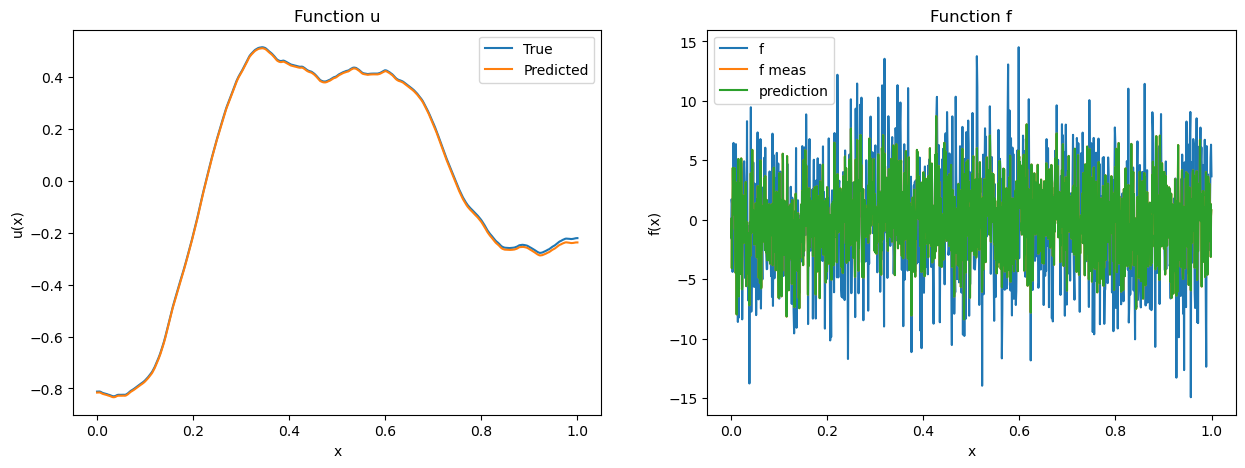

In [32]:
# Create 2 plots for the  function u and f
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x, u_values)
ax[0].plot(x, pred)
ax[0].set_xlabel("x")
ax[0].set_ylabel("u(x)")
ax[0].set_title("Function u")
ax[0].legend(["True", "Predicted"])

ax[1].plot(x, f_values, label = 'f')
ax[1].plot(centers, f_meas, label = 'f meas')
ax[1].plot(centers,(K@alpha)[2:], label = 'prediction')
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
ax[1].set_title("Function f")
ax[1].legend()

In [26]:
meas_pred = K@alpha

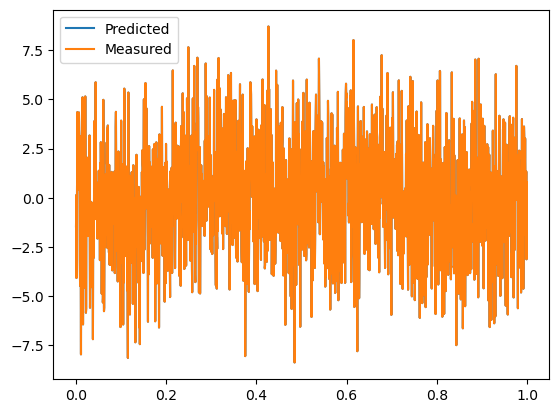

In [27]:
plt.plot(centers, meas_pred[2:], label = 'Predicted')
plt.plot(centers, f_meas, label = 'Measured')
plt.legend()